### [Black Friday Sale Analysis](https://)

### Dataset History

The company named ABC Pvt. Ltd. would like to investigate the buying pattern of their customers for particular product categories (specifically, the amount spent on the purchase). They have provided purchase summaries of several customers for specific high-traffic items from the previous month. Along with customer demographics which includes age, sex, marital status, city type, and how long the customer has stayed in the current city, the dataset contains the customer purchases details that include product ID and product category, as well as the total purchase amount for the last month.

Now, they plan to develop a model which will help to estimate the purchase amount for various products so that customers can be targeted with personalized offers for particular products.



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/datasets/rajeshrampure/black-friday-sale/data

Concerning this Dataset

User_ID - User Identification Number

Product_ID - Item Identification Number

Gender - User's Gender

Age - Age Group

Occupation - Job Title (Not revealed)

City_Category - City Classification (A, B, C)

Stay_In_Current_City_Years - Years resident in current city

Marital_Status - Status of Marriage

Product_Category_1 - Categories to which the product belongs (Not revealed)

Product_Category_2 - Other categories which the product can belong to (Not revealed)

Product_Category_3 - Other categories which the product can belong to (Not revealed)

Purchase - Total Expense Made (Dependent Variable)



# Upload Dataset

In [2]:
df = pd.read_csv("train.csv")


# Data Handeling and Preprocessing

In [3]:
display(df.info())
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67760 entries, 0 to 67759
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     67760 non-null  int64  
 1   Product_ID                  67759 non-null  object 
 2   Gender                      67759 non-null  object 
 3   Age                         67759 non-null  object 
 4   Occupation                  67759 non-null  float64
 5   City_Category               67759 non-null  object 
 6   Stay_In_Current_City_Years  67759 non-null  object 
 7   Marital_Status              67759 non-null  float64
 8   Product_Category_1          67759 non-null  float64
 9   Product_Category_2          46523 non-null  float64
 10  Product_Category_3          20613 non-null  float64
 11  Purchase                    67759 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 6.2+ MB


None

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


# Business Context

The dataset pertains to a retail firm that seeks to comprehend client buying patterns. The company seeks to better its marketing plans, improve product suggestions, and maximize profit margins. As a consultant for data science, our objective is to study customers’ demographics, buying behavior, and product choices.



In [4]:
print(df.isnull().sum())

User_ID                           0
Product_ID                        1
Gender                            1
Age                               1
Occupation                        1
City_Category                     1
Stay_In_Current_City_Years        1
Marital_Status                    1
Product_Category_1                1
Product_Category_2            21237
Product_Category_3            47147
Purchase                          1
dtype: int64


In [22]:
df_numeric = df.select_dtypes(include=[np.number])
df.fillna(df_numeric.median(), inplace=True)
print(df.isnull().sum())

User_ID                       0
Product_ID                    1
Gender                        1
Age                           1
Occupation                    0
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Purchase_Range                1
dtype: int64


In [6]:
print(df['Purchase'].unique())
print(df['City_Category'].unique())
print(df['Product_Category_3'].unique())
print(df['Product_Category_2'].unique())
print(df['Product_Category_1'].unique())
print(df['Marital_Status'].unique())
print(df['City_Category'].unique())
print(df['Occupation'].unique())
print(df['Age'].unique())

[ 8370. 15200.  1422. ...  8349.  9645.    nan]
['A' 'C' 'B' nan]
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[ 3.  1. 12.  8.  5.  4.  2.  6. 14. 11. 13. 15.  7. 16. 18. 10. 17.  9.
 nan]
[ 0.  1. nan]
['A' 'C' 'B' nan]
[10. 16. 15.  7. 20.  9.  1. 12. 17.  0.  3.  4. 11.  8. 19.  2. 18.  5.
 14. 13.  6. nan]
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25' nan]


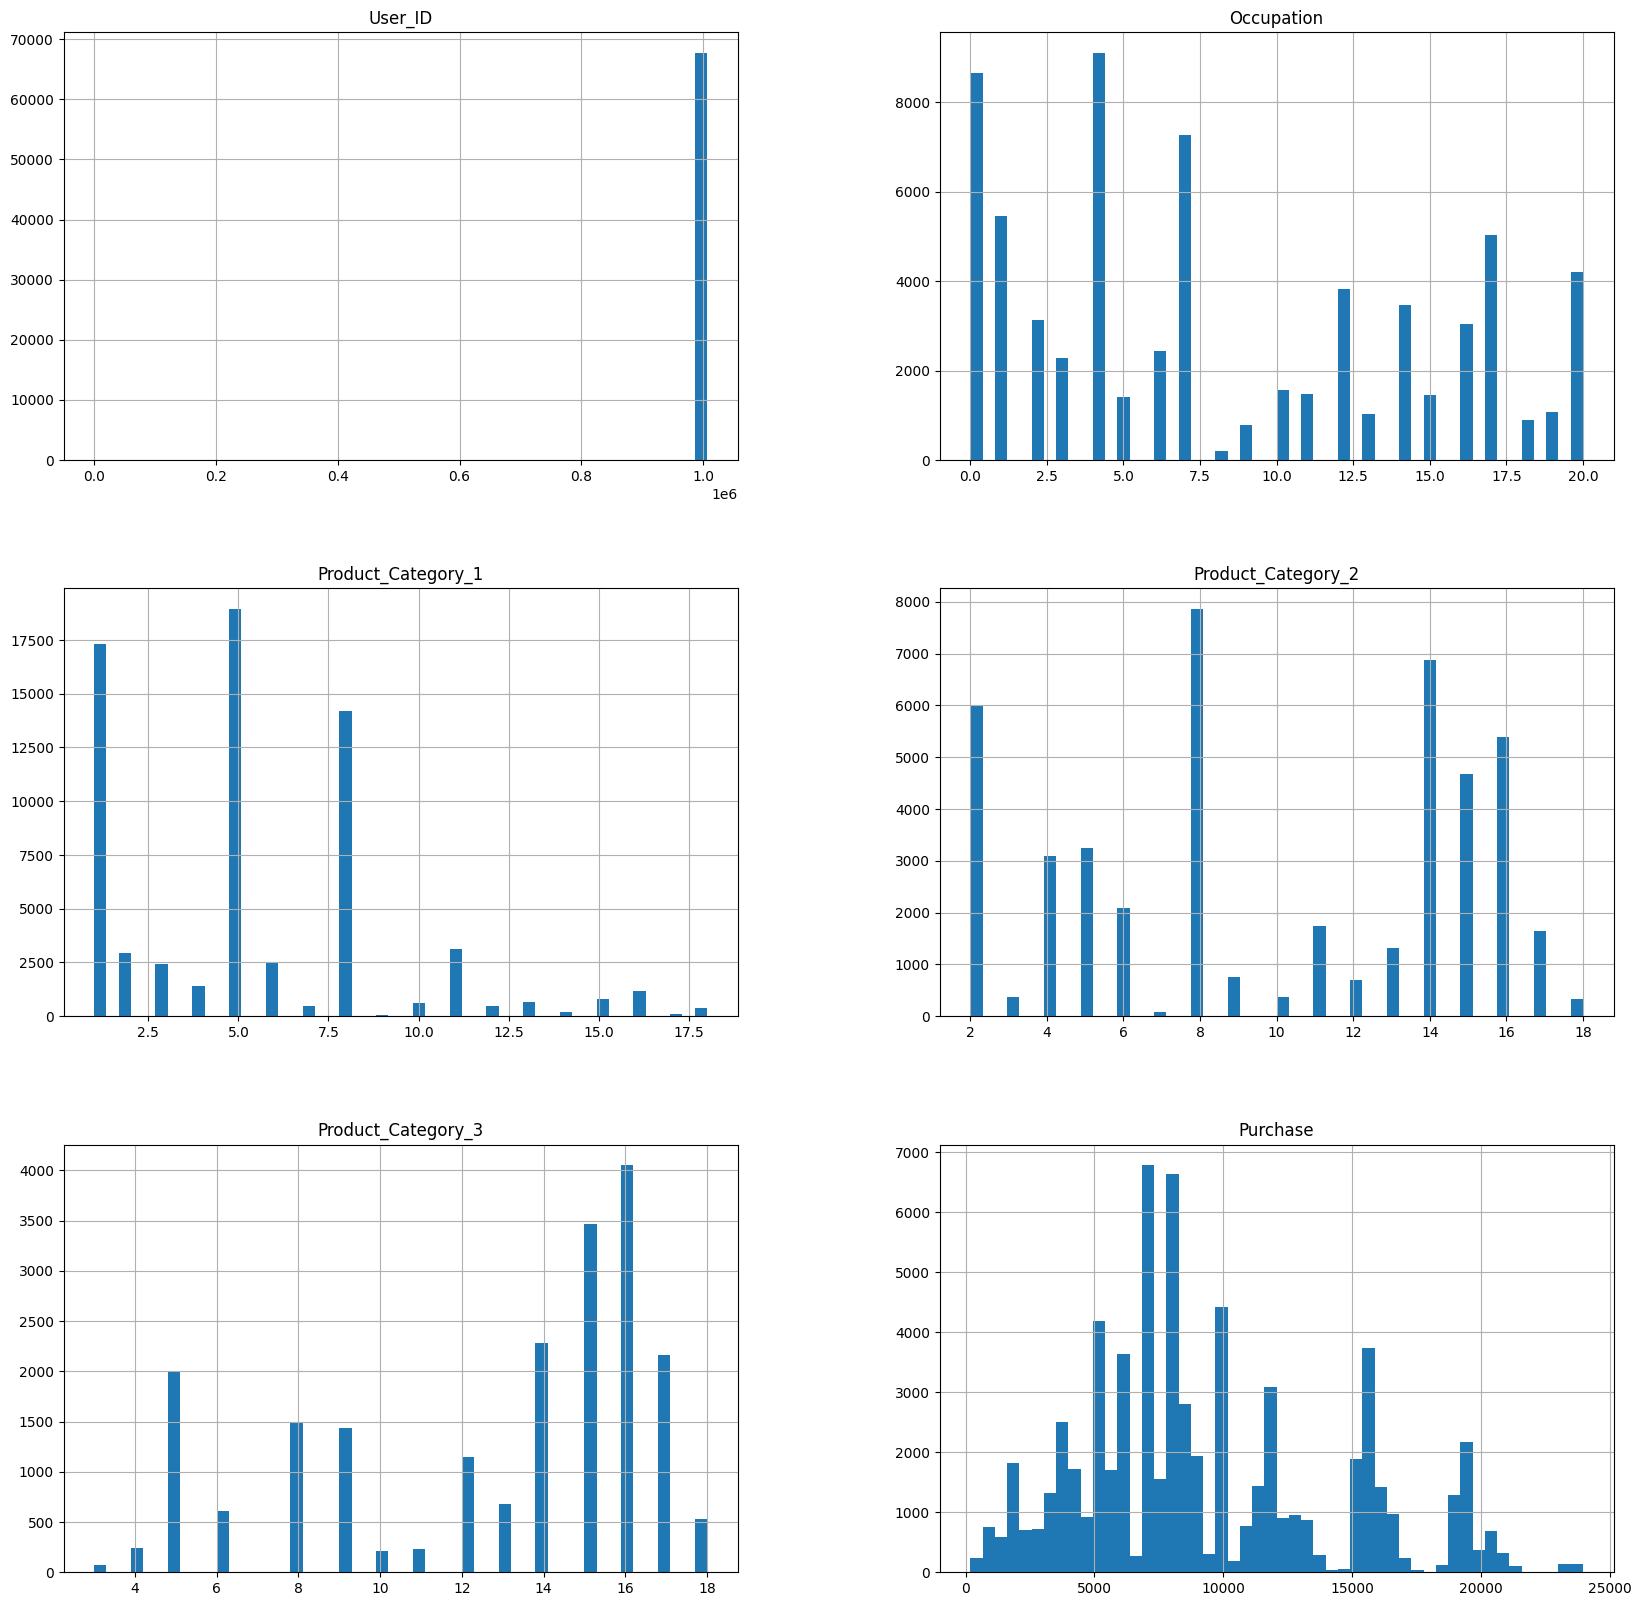

In [7]:
# Overall (total) distribution:
df.drop(columns = "Marital_Status").hist(bins = 50 , figsize= (20,20))
plt.show()

# Analytical Data Examination - Business Queries

### 1. How are the purchase amounts distributed?



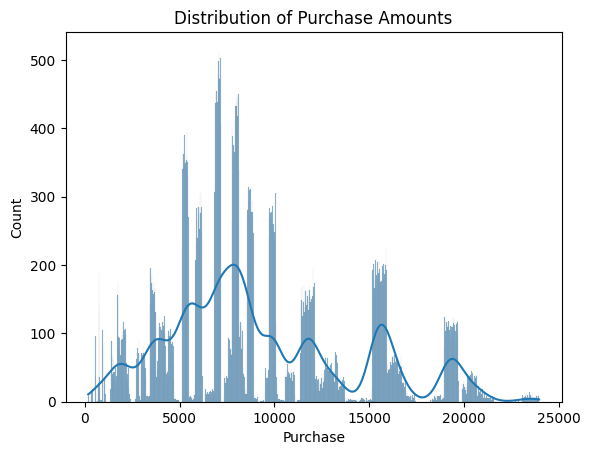

In [8]:
sns.histplot(df['Purchase'], bins=1000, kde=True)
plt.title('Distribution of Purchase Amounts')
plt.show()


### 2. Which age group spends the most money on shopping?

Age
51-55    9686.253175
55+      9390.022787
36-45    9366.177430
26-35    9285.268565
46-50    9185.771080
18-25    9151.089579
0-17     9103.752664
Name: Purchase, dtype: float64


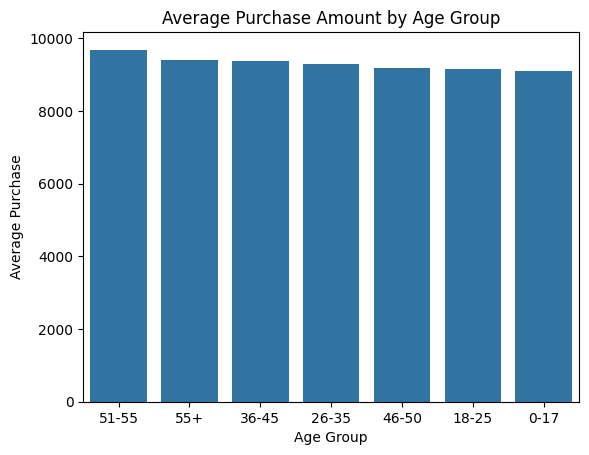

In [9]:
age_group_spending = df.groupby('Age')['Purchase'].mean().sort_values(ascending=False)
print(age_group_spending)

sns.barplot(x=age_group_spending.index, y=age_group_spending.values)
plt.title('Average Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase')
plt.show()

## 3. Do males or females spend more?

Gender
F    8765.980230
M    9462.318384
Name: Purchase, dtype: float64


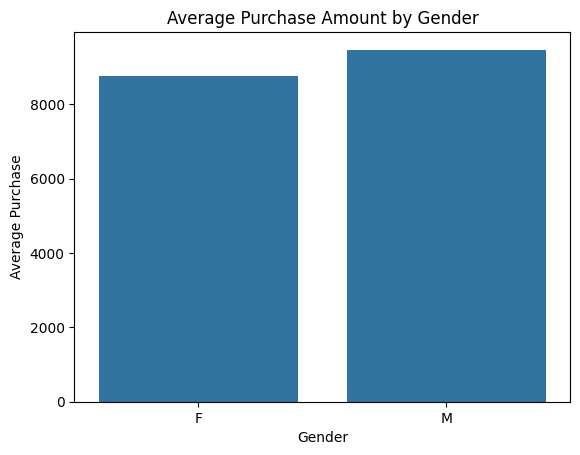

In [10]:
gender_spending = df.groupby('Gender')['Purchase'].mean()
print(gender_spending)

sns.barplot(x=gender_spending.index, y=gender_spending.values)
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase')
plt.show()


## 4. Which city category has the highest spending?

City_Category
B    264049410.0
C    204064390.0
A    161772502.0
Name: Purchase, dtype: float64


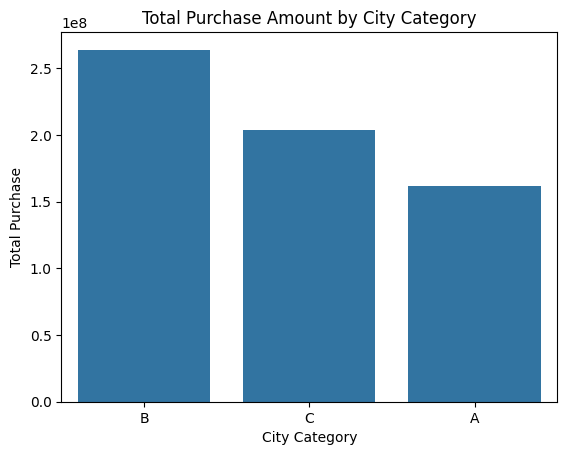

In [11]:
city_spending = df.groupby('City_Category')['Purchase'].sum().sort_values(ascending=False)
print(city_spending)

sns.barplot(x=city_spending.index, y=city_spending.values)
plt.title('Total Purchase Amount by City Category')
plt.xlabel('City Category')
plt.ylabel('Total Purchase')
plt.show()

## 5. What product categories are most popular?

Product_Category_1
5.0     18955
1.0     17335
8.0     14186
11.0     3143
2.0      2959
6.0      2473
3.0      2426
4.0      1424
16.0     1167
15.0      777
13.0      666
10.0      603
12.0      482
7.0       470
18.0      361
Name: count, dtype: int64


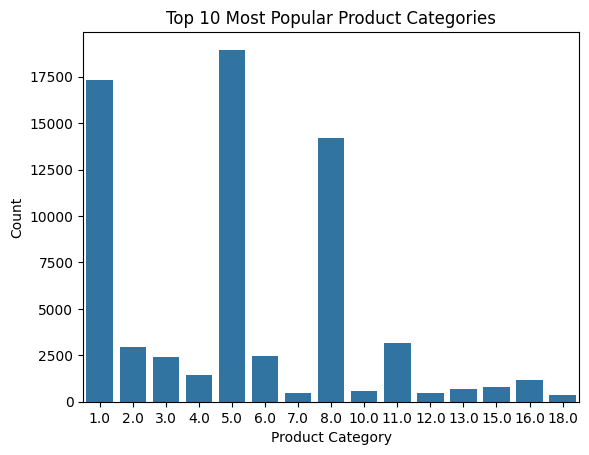

In [12]:
product_popularity = df['Product_Category_1'].value_counts().head(15)
print(product_popularity)

sns.barplot(x=product_popularity.index, y=product_popularity.values)
plt.title('Top 10 Most Popular Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()


## 6. Are certain products preferred in specific city categories?

Product_Category_1  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
City_Category                                                              
A                   4246   841   578   381  5226   629   161  4052    15   
B                   7328  1232  1053   631  8109  1082   206  5866    27   
C                   5761   886   795   412  5620   762   103  4268    20   

Product_Category_1  10.0  11.0  12.0  13.0  14.0  15.0  16.0  17.0  18.0  
City_Category                                                             
A                    158   887   134   187    65   205   332    23    80  
B                    249  1348   210   291    82   307   494    30   169  
C                    196   908   138   188    45   265   341    25   112  


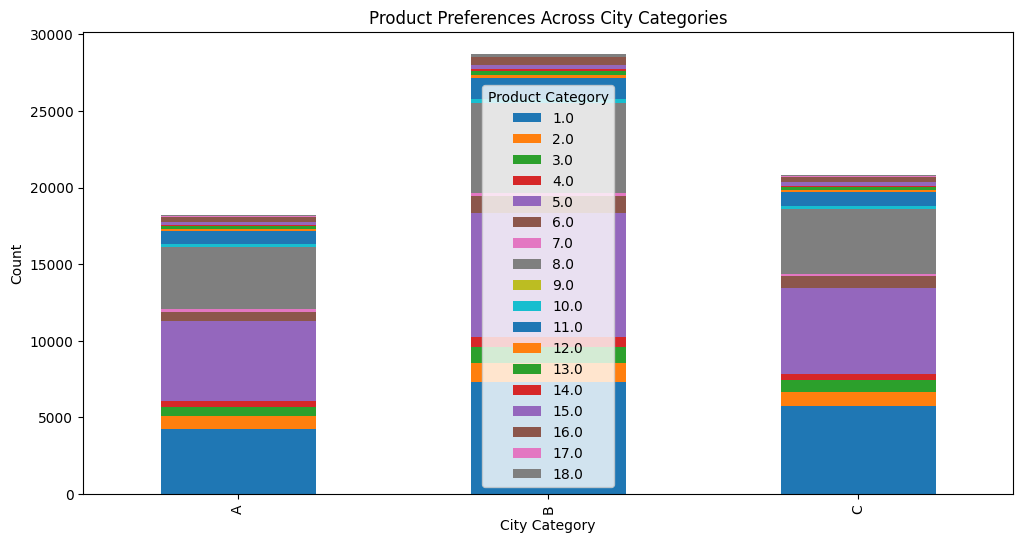

In [13]:
city_product_pref = df.groupby(['City_Category', 'Product_Category_1']).size().unstack().fillna(0)
print(city_product_pref)

city_product_pref.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Product Preferences Across City Categories')
plt.xlabel('City Category')
plt.ylabel('Count')
plt.legend(title='Product Category')
plt.show()

## 7. What is the seasonal trend in purchase behavior?

Purchase_Range  Very Low    Low  Medium  High  Very High
Age                                                     
0-17                 366    752     309   246        110
18-25               2358   5575    2317  1778        754
26-35               4528  11775    5038  3852       1564
36-45               2174   5919    2655  2037        764
46-50                863   2474    1055   751        265
51-55                649   2110     976   740        328
55+                  356   1220     595   355        151


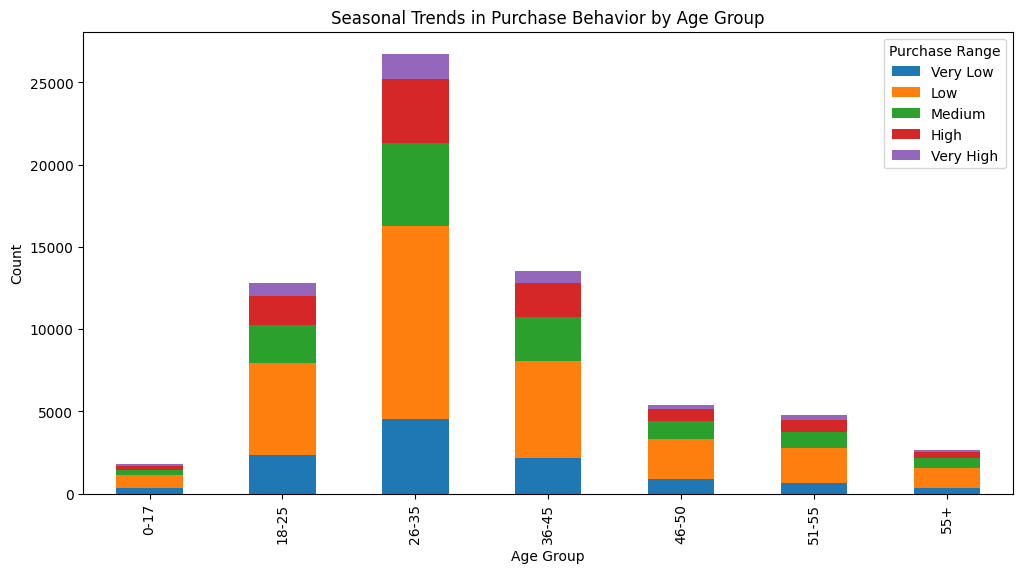

In [18]:
df['Purchase_Range'] = pd.cut(df['Purchase'], bins=5, labels=["Very Low", "Low", "Medium", "High", "Very High"])
purchase_trend = df.groupby(['Age', 'Purchase_Range'], observed=False).size().unstack()
print(purchase_trend)

purchase_trend.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Seasonal Trends in Purchase Behavior by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Purchase Range')
plt.show()
